In [1]:
import os
import pandas as pd

base_path = r"B:\_GITHUB\domain_adaptive_thorax_disease_classification\pytorch-adda\data\The IQ-OTHNCCD lung cancer dataset"

benign_dirs = [os.path.join(base_path,"Bengin cases")]
Malignant_dir = [os.path.join(base_path,"Malignant cases")]
Normal_dirs = [os.path.join(base_path,"Normal cases")]

filepaths = []
labels = []
dict_lists = [benign_dirs, Malignant_dir, Normal_dirs]
class_labels = ['benign', 'Malignant', 'Normal']

for i, dir_list in enumerate(dict_lists):
    for j in dir_list:
        flist = os.listdir(j)
        for f in flist:
            fpath = os.path.join(j, f)
            filepaths.append(fpath)
            labels.append(class_labels[i])

Fseries = pd.Series(filepaths, name="filepaths")
Lseries = pd.Series(labels, name="labels")
Lung_data = pd.concat([Fseries, Lseries], axis=1)
Lung_df = pd.DataFrame(Lung_data)
print(Lung_df.head())
print(Lung_df["labels"].value_counts())

                                           filepaths  labels
0  B:\_GITHUB\domain_adaptive_thorax_disease_clas...  benign
1  B:\_GITHUB\domain_adaptive_thorax_disease_clas...  benign
2  B:\_GITHUB\domain_adaptive_thorax_disease_clas...  benign
3  B:\_GITHUB\domain_adaptive_thorax_disease_clas...  benign
4  B:\_GITHUB\domain_adaptive_thorax_disease_clas...  benign
labels
Malignant    561
Normal       416
benign       120
Name: count, dtype: int64


Lung cancer data saved to B:\_GITHUB\domain_adaptive_thorax_disease_classification\pytorch-adda\data\lung_cancer_data.csv


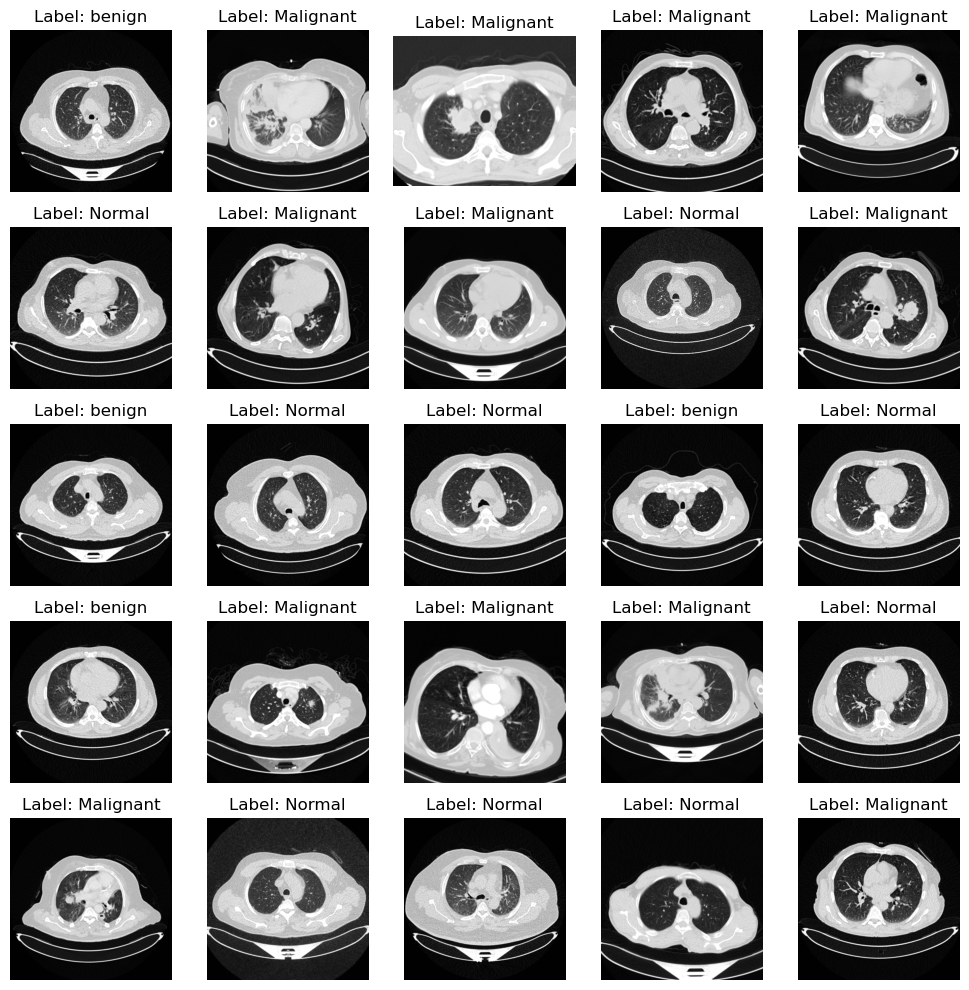

In [1]:
import os
import random
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

# Paths to the dataset directories
base_path = r"B:\_GITHUB\domain_adaptive_thorax_disease_classification\pytorch-adda\data\The IQ-OTHNCCD lung cancer dataset"
benign_dirs = [os.path.join(base_path, "Bengin cases")]
Malignant_dir = [os.path.join(base_path, "Malignant cases")]
Normal_dirs = [os.path.join(base_path, "Normal cases")]

filepaths = []
labels = []
dict_lists = [benign_dirs, Malignant_dir, Normal_dirs]
class_labels = ['benign', 'Malignant', 'Normal']

# Loop through the directories and gather file paths and labels
for i, dir_list in enumerate(dict_lists):
    for j in dir_list:
        flist = os.listdir(j)
        for f in flist:
            fpath = os.path.join(j, f)
            filepaths.append(fpath)
            labels.append(class_labels[i])

# Shuffle filepaths and labels in unison
combined = list(zip(filepaths, labels))
random.shuffle(combined)
filepaths[:], labels[:] = zip(*combined)

# Save file paths and labels to a CSV file
lung_cancer_df = pd.DataFrame({
    'filepaths': filepaths,
    'labels': labels
})
csv_path = r"B:\_GITHUB\domain_adaptive_thorax_disease_classification\pytorch-adda\data\lung_cancer_data.csv"
lung_cancer_df.to_csv(csv_path, index=False)
print(f"Lung cancer data saved to {csv_path}")

# Function to visualize images
def visualize_images(filepaths, labels, num_images=25):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        img_path = filepaths[i]
        label = labels[i]
        # Load the image using PIL
        img = Image.open(img_path).convert('L')  # Convert to grayscale if necessary
        
        # Plot the image
        plt.subplot(5, 5, i+1)
        plt.imshow(img, cmap='gray')
        plt.title(f"Label: {label}")
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Visualize 25 random images
visualize_images(filepaths, labels, num_images=25)
